In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

__Read DataSet__

In [8]:
df = pd.read_csv('cereal.csv')
df.head()
df['fullmfr'] = df.mfr.map({'N':'Nabisco','Q':'Quaker Oats','K':'Kelloggs','R':'Raslston Purina',
                            'G':'General Mills' ,'P':'Post' ,'A':'American Home Foods Products',})
df.head()                            

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,fullmfr
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,Nabisco
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,Quaker Oats
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,Kelloggs
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,Kelloggs
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,Raslston Purina


(array([ 8.,  4., 13.,  6.,  7.,  9.,  9.,  5., 11.,  5.]),
 array([-1. ,  0.6,  2.2,  3.8,  5.4,  7. ,  8.6, 10.2, 11.8, 13.4, 15. ]),
 <a list of 10 Patch objects>)

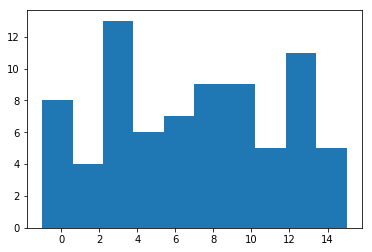

In [81]:
plt.hist(df.sugars)

(array([ 8.,  0., 63.,  0.,  0.,  0.,  0.,  0.,  0.,  6.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

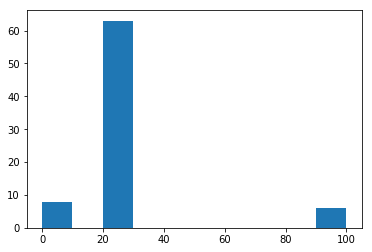

In [82]:
plt.hist(df.vitamins)

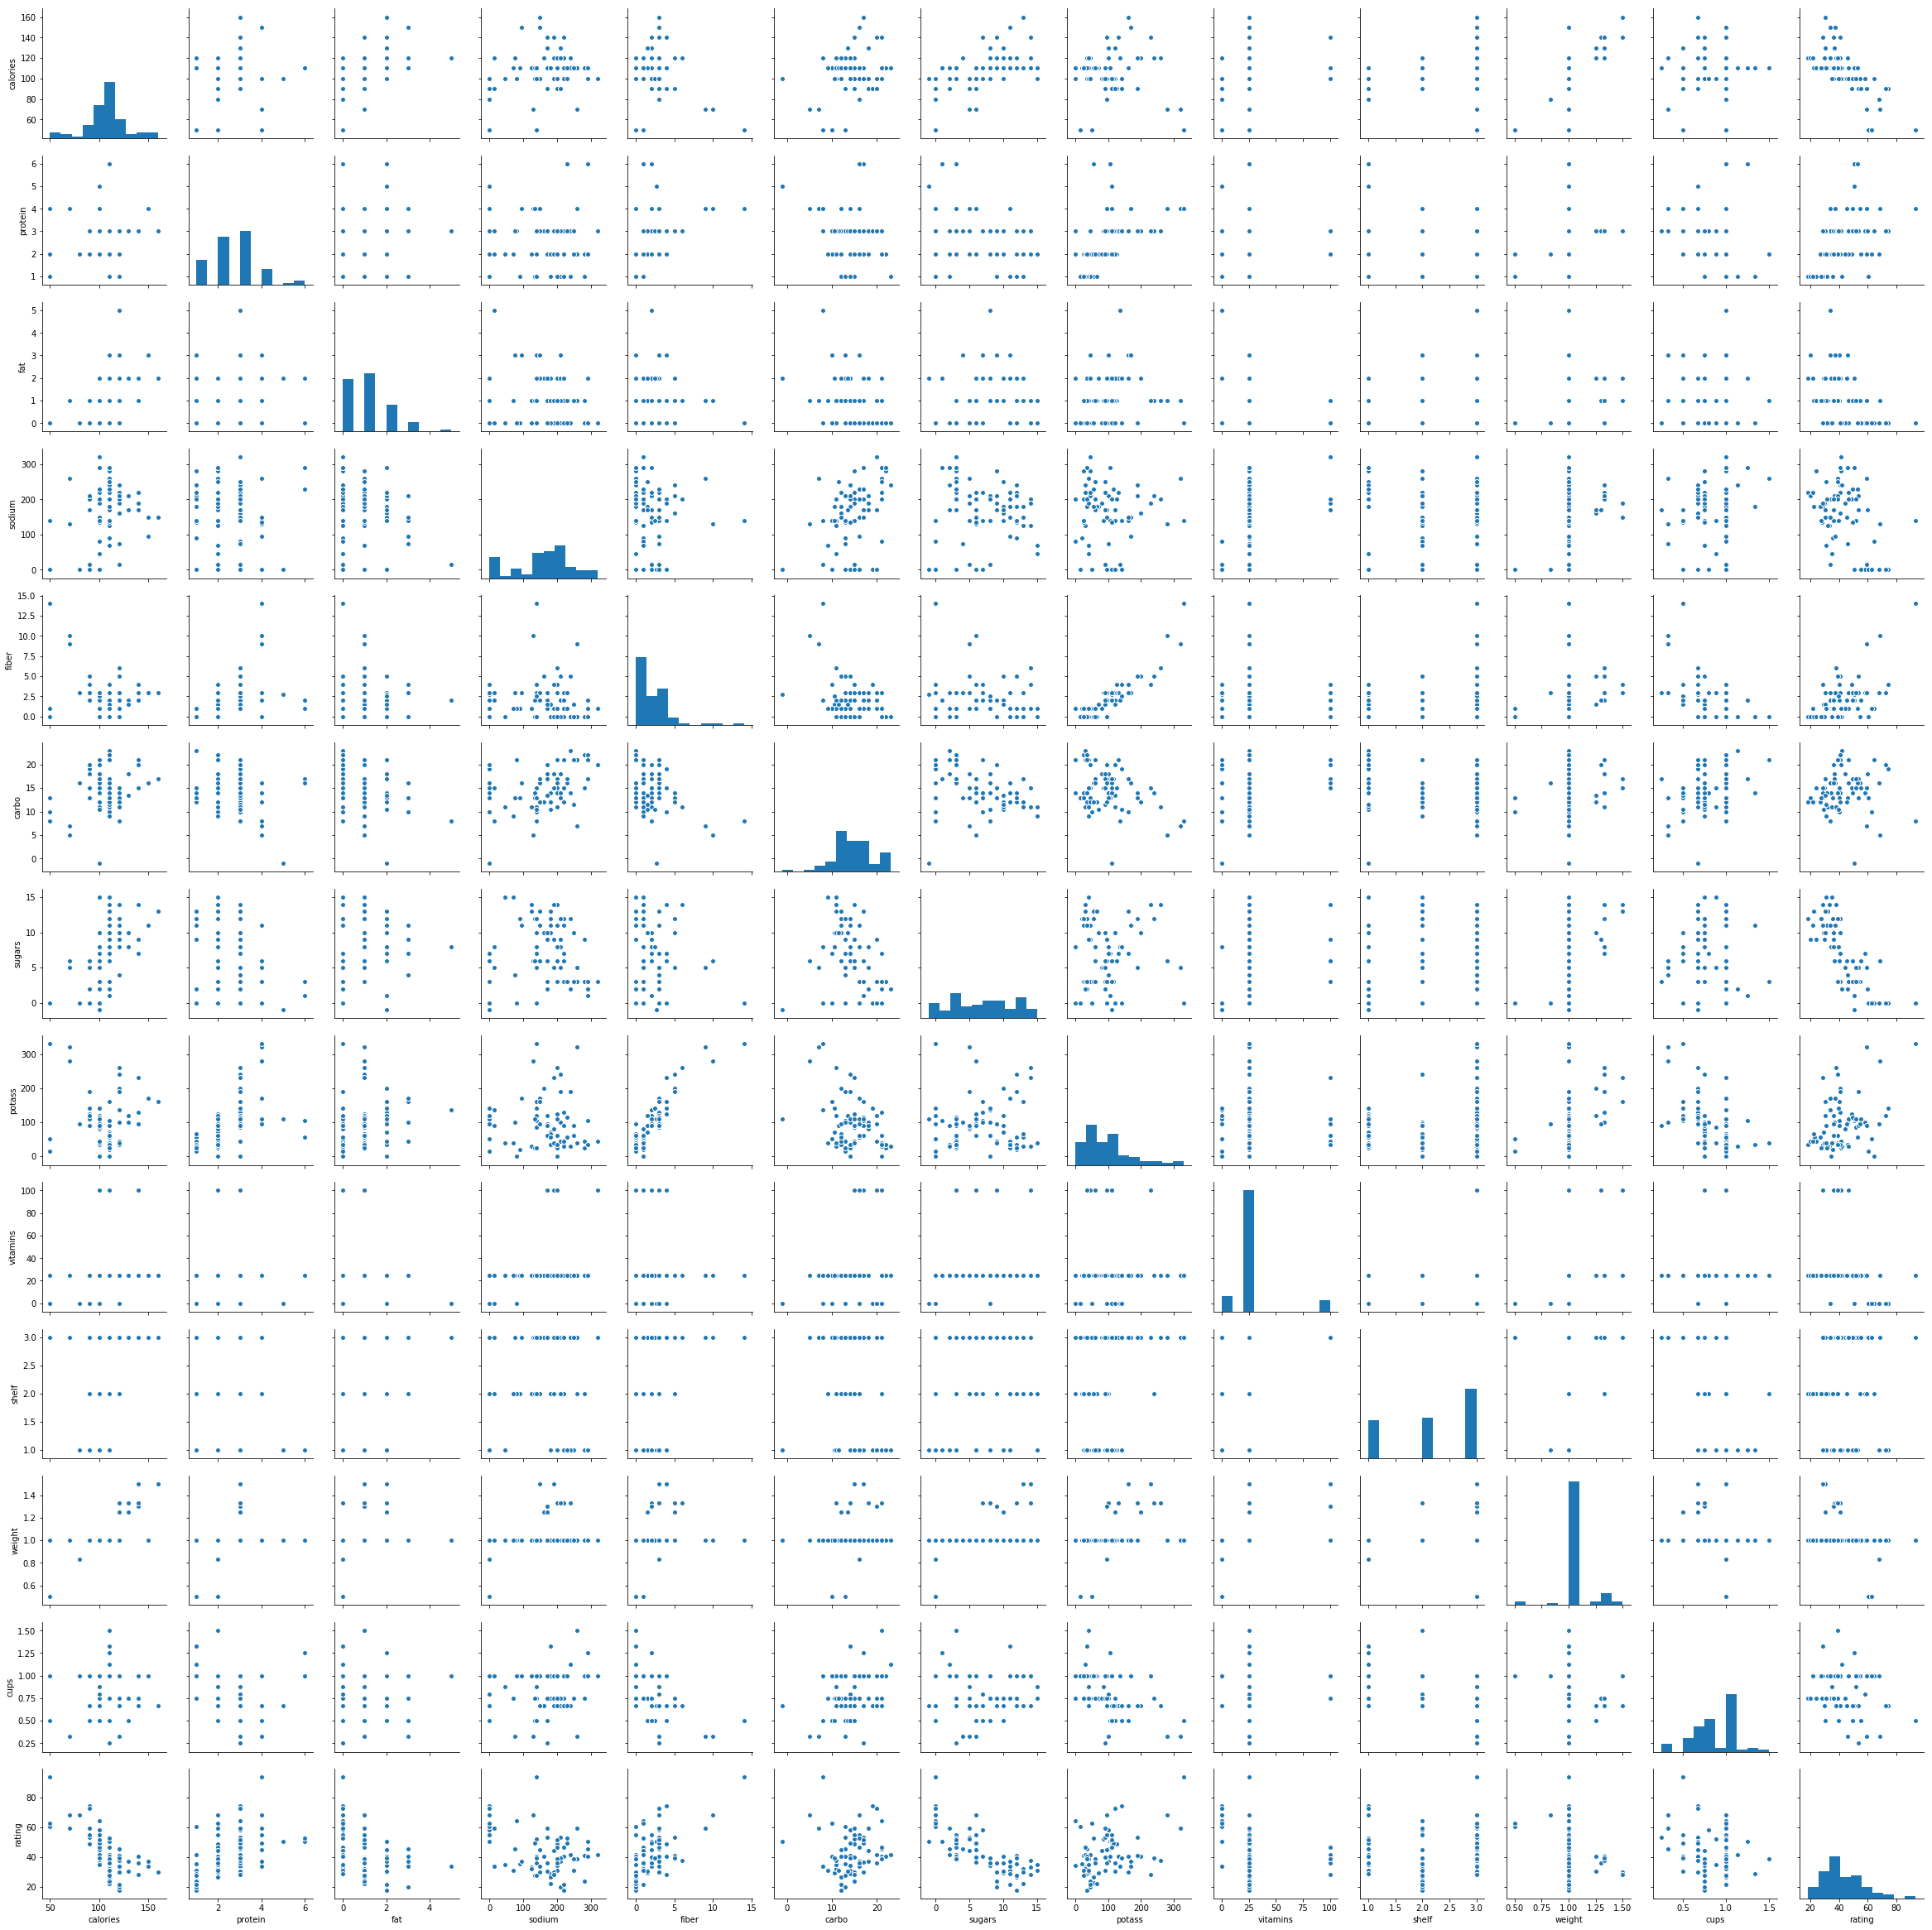

In [83]:
sns.pairplot(df)

__Create a bar plot where each manufacturer is on the y axis and the height of the bars depict the number of cereals manufactured by them.__

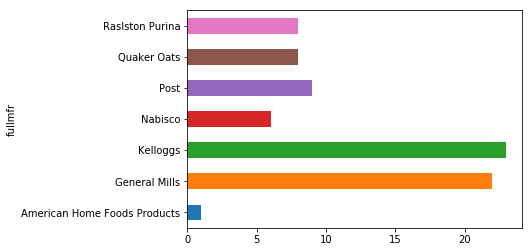

In [12]:
df.groupby('fullmfr')['name'].count().plot(kind='barh')

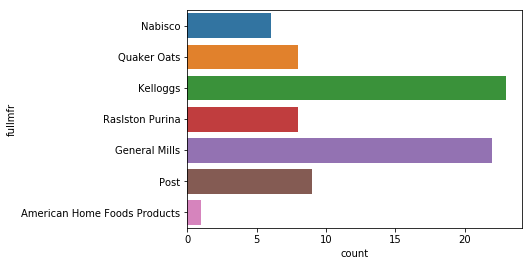

In [15]:
sns.countplot(y=df.fullmfr)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 17 columns):
name        77 non-null object
mfr         77 non-null object
type        77 non-null object
calories    77 non-null int64
protein     77 non-null int64
fat         77 non-null int64
sodium      77 non-null int64
fiber       77 non-null float64
carbo       77 non-null float64
sugars      77 non-null int64
potass      77 non-null int64
vitamins    77 non-null int64
shelf       77 non-null int64
weight      77 non-null float64
cups        77 non-null float64
rating      77 non-null float64
fullmfr     77 non-null object
dtypes: float64(5), int64(8), object(4)
memory usage: 10.3+ KB


__Create independent/predictor [x] and terget/dependent variable[y] __

__Here we need to predict rating which is continuous terget. So we are go ahead for Liner Regrassion__

In [68]:
df.head()
x=df.drop(['name','fullmfr','rating','mfr','type'],axis=1)
y=df.rating
x.head()
y.head()

0    68.402973
1    33.983679
2    59.425505
3    93.704912
4    34.384843
Name: rating, dtype: float64

In [69]:
df.nunique()

name        77
mfr          7
type         2
calories    11
protein      6
fat          5
sodium      27
fiber       13
carbo       22
sugars      17
potass      36
vitamins     3
shelf        3
weight       7
cups        12
rating      77
fullmfr      7
dtype: int64

__Check Correlation__

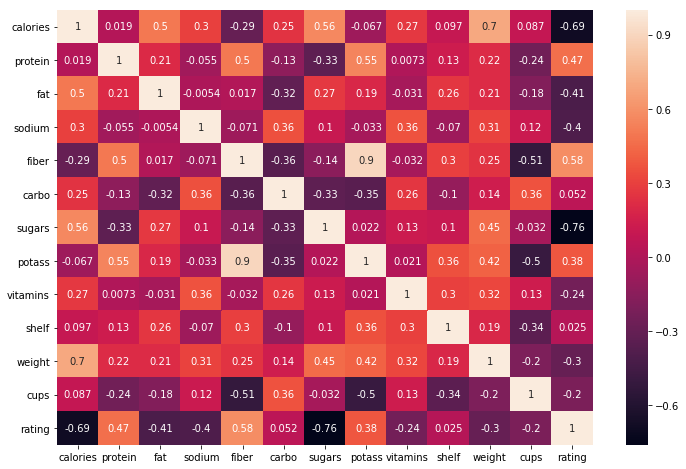

In [29]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

In [51]:
x.nunique()

calories    11
protein      6
fat          5
sodium      27
fiber       13
carbo       22
sugars      17
potass      36
vitamins     3
shelf        3
weight       7
cups        12
dtype: int64

__Use Standard Scalar on predictor for linear regrassion to increase accuracy of model__

In [52]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 12 columns):
calories    77 non-null int64
protein     77 non-null int64
fat         77 non-null int64
sodium      77 non-null int64
fiber       77 non-null float64
carbo       77 non-null float64
sugars      77 non-null int64
potass      77 non-null int64
vitamins    77 non-null int64
shelf       77 non-null int64
weight      77 non-null float64
cups        77 non-null float64
dtypes: float64(4), int64(8)
memory usage: 7.3 KB


In [61]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [62]:
ln = LinearRegression()

In [63]:
ln.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [64]:
print('Training Score:',ln.score(x_train,y_train))
print('Test Score:',ln.score(x_test,y_test))

Training Score: 0.9999999999999997
Test Score: 0.9999999999999993


In [65]:
y_predict = ln.predict(x_test)

In [66]:
mean_squared_error(y_test,y_predict)

1.8995396831654214e-13

__Top 5 Factor for Rating __

In [67]:
slopes =  pd.DataFrame({'Feature':x.columns, 'Coef':ln.coef_, 'Abs_coef': np.abs(ln.coef_)})
slopes.sort_values(by = 'Abs_coef', ascending = False).head()

,Feature,Coef,Abs_coef
4,fiber,3.443480,3.443480
1,protein,3.273174,3.273174
2,fat,-1.691408,1.691408
5,carbo,1.092451,1.092451
6,sugars,-0.724895,0.724895


In [70]:
y_predict

array([38.83974517, 31.23005445, 49.78744517, 45.8633246 , 58.34514156,
       93.70491283, 49.51187435, 31.07221739, 19.82357253, 41.99893299,
       35.25244373, 64.53381615, 46.65884409, 40.40020796, 28.59278441,
       32.20758153, 18.04285074, 36.47151189, 36.17619612, 53.3710075 ])

In [78]:
x_test.iloc[2].values @ ln.coef_+ln.intercept_ 

49.787445165983826

In [79]:
x_test.iloc[2]

calories    100.00
protein       3.00
fat           1.00
sodium      230.00
fiber         3.00
carbo        17.00
sugars        3.00
potass      115.00
vitamins     25.00
shelf         1.00
weight        1.00
cups          0.67
Name: 74, dtype: float64